In [ ]:
#Student Details

'''
Name and Surname:Phangisa Mpendulo Tresure
Student No: ST10257305

'''



In [1]:
# Imports
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import cv2
from PIL import Image

# Confirm mtcnn was installed correctly
import mtcnn
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Rectangle

from os import listdir
from tqdm import tqdm
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

c:\Users\tphan\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(407, 612, 3)


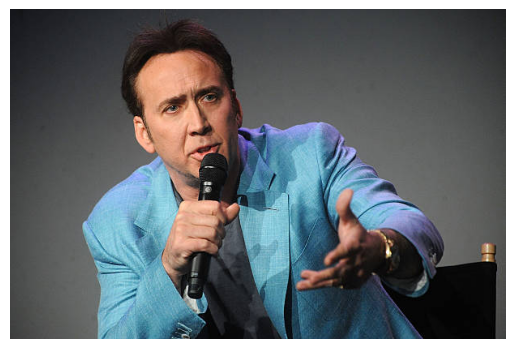

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Use double backslashes in the path
DIRECTORY = 'C:\\Users\\tphan\\Desktop\\PDDA 2\\Adverising\\POE\\cage'

# Specify the filename correctly with the complete path
filename = 'C:\\Users\\tphan\\Desktop\\PDDA 2\\Adverising\\POE\\cage\\Actor Nicolas Cage attends _Meet The Filmmakers_ at Apple Store Soho on April 10, 2014 in New York City..jpg'

# Read the image
pixels = plt.imread(filename)

# If the image is grayscale and you want to convert it to RGB
if len(pixels.shape) == 2:  # Check if it's grayscale
    rgb_pixels = np.stack((pixels, pixels, pixels), axis=2)
else:
    rgb_pixels = pixels  # It's already in RGB

# Print the shape of the RGB image
print(rgb_pixels.shape)

# Display the image
plt.imshow(rgb_pixels)
plt.axis('off')  # Hide axis ticks for better visualization
plt.show()


In [10]:
# Create the detector, using default weights
detector = MTCNN()
# detect faces in the image
results = detector.detect_faces(rgb_pixels)
results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


[{'box': [169, 55, 107, 149],
  'confidence': 0.9999029636383057,
  'keypoints': {'left_eye': (202, 120),
   'right_eye': (248, 110),
   'nose': (235, 141),
   'mouth_left': (219, 176),
   'mouth_right': (256, 167)}}]

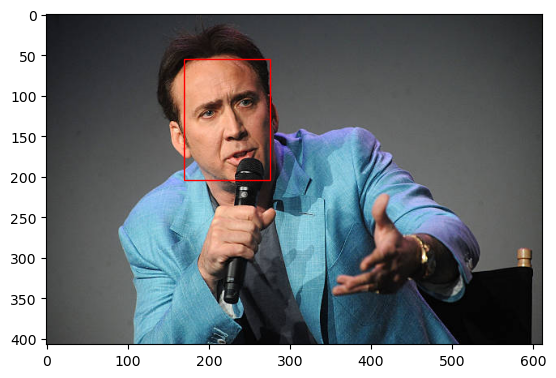

In [11]:


# draw an image with detected objects
def draw_image_with_boxes(data, result_list):
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
    # show the plot
    plt.show()

# display faces on the original image
draw_image_with_boxes(rgb_pixels, results)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


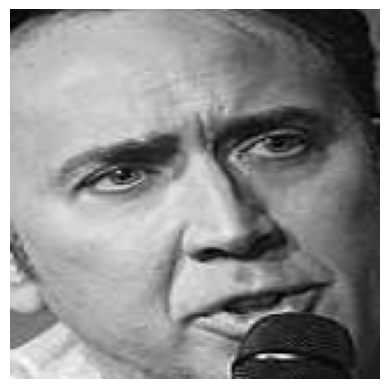

In [26]:
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt
from mtcnn.mtcnn import MTCNN

# Create the detector, using default weights
detector = MTCNN()

# Extract a single face from a given photograph
def extract_face_from_file(filename, required_size=(160, 160)):
    # Load image from file
    image = Image.open(filename)
    
    return extract_face(image, required_size)

def extract_face(image, required_size=(160, 160)):
    # Convert to RGB, if needed
    image = image.convert('RGB')
    # Convert to array
    pixels = np.asarray(image)
    # Detect faces in the image
    results = detector.detect_faces(pixels)

    # Check if any faces were detected
    if len(results) == 0:
        raise ValueError("No faces detected in the image.")

    # Extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # Bug fix: Ensure coordinates are positive
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height

    # Extract the face
    face = pixels[y1:y2, x1:x2]
    # Resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    gray_face = cv2.cvtColor(face_array, cv2.COLOR_BGR2GRAY)
    
    return gray_face

# Load the photo and extract the face
filename = r'C:\Users\tphan\Desktop\PDDA 2\Adverising\POE\cage\Actor Nicolas Cage attends _Meet The Filmmakers_ at Apple Store Soho on April 10, 2014 in New York City..jpg'

try:
    face_pixels = extract_face_from_file(filename)
    plt.imshow(face_pixels, cmap='gray')  # Display in grayscale
    plt.axis('off')  # Hide axes for better visualization
    plt.show()
except ValueError as e:
    print(e)
except Exception as e:
    print(f"An error occurred: {e}")


In [15]:
def list_files(directory, contains):
    return list(f for f in listdir(directory) if contains in f)

In [60]:
i = 1
faces = list()
for filename in tqdm(list_files(DIRECTORY, "subject")[0:16]):
    # path
    path = DIRECTORY + filename
    # get face
    face = extract_face_from_file(path)
    # plot
    plt.subplot(4, 4, i)
    plt.axis('off')
    plt.imshow(face)
    faces.append(face)
    i += 1
plt.show()


All Files in Directory: ['Actor Nicolas Cage attends the premiere of _Renfield_ in New York City on March 28, 2023..jpg', 'Actor Nicolas Cage attends _Meet The Filmmakers_ at Apple Store Soho on April 10, 2014 in New York City..jpg', 'Actors Nicholas Cage and Ami Dolenz attend an event in March 1988 in Los Angeles, California..jpg', "Director John Woo watches as Nicolas Cage aims pistol in between scenes from the film 'Face_Off', 1997..jpg", 'Episode 1161 -- Pictured_ Nicolas Cage --.jpg', 'Episode 517 -- Pictured_ Actor Nicolas Cage during an interview with host Jay Leno on August 11, 1994 --.jpg', "Nicolas Cage and John Travolta aiming guns at each other in a scene from the film 'Face_Off', 1997..jpg", 'Nicolas Cage And John Travolta Star In The New Movie _Face Off_.jpg', 'Nicolas Cage attends the 2021 Gotham Awards at Cipriani Wall Street on November 29, 2021 in New York City..jpg', 'Nicolas Cage attends the 96th Annual Academy Awards on March 10, 2024 in Hollywood, California..jpg'

0it [00:00, ?it/s]


In [66]:
print("Directory Path:", DIRECTORY)

def list_all_files(directory):
    return os.listdir(directory)

all_files = list_all_files(DIRECTORY)
print("All Files in Directory:", all_files)

Directory Path: C:\Users\tphan\Desktop\PDDA 2\Adverising\POE\cage
All Files in Directory: ['Actor Nicolas Cage attends the premiere of _Renfield_ in New York City on March 28, 2023..jpg', 'Actor Nicolas Cage attends _Meet The Filmmakers_ at Apple Store Soho on April 10, 2014 in New York City..jpg', 'Actors Nicholas Cage and Ami Dolenz attend an event in March 1988 in Los Angeles, California..jpg', "Director John Woo watches as Nicolas Cage aims pistol in between scenes from the film 'Face_Off', 1997..jpg", 'Episode 1161 -- Pictured_ Nicolas Cage --.jpg', 'Episode 517 -- Pictured_ Actor Nicolas Cage during an interview with host Jay Leno on August 11, 1994 --.jpg', "Nicolas Cage and John Travolta aiming guns at each other in a scene from the film 'Face_Off', 1997..jpg", 'Nicolas Cage And John Travolta Star In The New Movie _Face Off_.jpg', 'Nicolas Cage attends the 2021 Gotham Awards at Cipriani Wall Street on November 29, 2021 in New York City..jpg', 'Nicolas Cage attends the 96th Annu

In [43]:
# Print classnames
df['subject'].unique()

array([], dtype=int64)

In [68]:
def list_files(directory):
    return os.listdir(directory)  # No pattern filtering

In [69]:
def list_files(directory, extension):
    return [f for f in os.listdir(directory) if f.endswith(extension)]

# Call the function with the specific extension
filenames = list_files(DIRECTORY, ".jpg")  # Example for JPG files

In [85]:
# Create DataFrame from all filenames
df = pd.DataFrame(all_filenames, columns=['filename'])

# Check the DataFrame
print("\nDataFrame with All Files:")
print(df.head())



DataFrame with All Files:
                                            filename
0  Actor Nicolas Cage attends the premiere of _Re...
1  Actor Nicolas Cage attends _Meet The Filmmaker...
2  Actors Nicholas Cage and Ami Dolenz attend an ...
3  Director John Woo watches as Nicolas Cage aims...
4      Episode 1161 -- Pictured_ Nicolas Cage --.jpg


In [86]:
print(df)

                                             filename
0   Actor Nicolas Cage attends the premiere of _Re...
1   Actor Nicolas Cage attends _Meet The Filmmaker...
2   Actors Nicholas Cage and Ami Dolenz attend an ...
3   Director John Woo watches as Nicolas Cage aims...
4       Episode 1161 -- Pictured_ Nicolas Cage --.jpg
5   Episode 517 -- Pictured_ Actor Nicolas Cage du...
6   Nicolas Cage and John Travolta aiming guns at ...
7   Nicolas Cage And John Travolta Star In The New...
8   Nicolas Cage attends the 2021 Gotham Awards at...
9   Nicolas Cage attends the 96th Annual Academy A...
10  Nicolas Cage attends the Neon Premiere of _PIG...
11  Nicolas Cage during _National Treasure_ London...
12  Nicolas Cage is seen at Los Angeles Internatio...
13  Nicolas Cage is seen at _Jimmy Kimmel Live_ on...
14  Nicolas Cage is seen in the Upper East Si on A...
15  Nicolas Cage, Francis Ford Coppola, Sofia Copp...
16                                   Nicolas Cage.jpg
17  Oscar Winner Nicolas Cag

In [101]:
PER_CLASS = 8 # 11 images (3 test & 8 train)
NO_CLASSES = 15
DS_SIZE = df["subject"].count()
TEST_SIZE = 1 - (PER_CLASS * NO_CLASSES / DS_SIZE)

# # list files for each group
# # df.groupby(['subject'])['filename'].apply(list)
y = df['subject']
X = df.drop('subject',axis=1)

# # subject
X_train_info, X_test_info, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=45, stratify=y)

y_train = y_train.tolist()
y_test = y_test.tolist()

In [102]:
detector = MTCNN()

def load_dataset(dataset):
    faces = list()
    for filename in tqdm(dataset["filename"]):
        path = DIRECTORY + filename
        # get face
        face = extract_face_from_file(path)
        faces.append(face)
    return np.asarray(faces)

In [104]:
# develop a classifier for faces
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
import random

In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming df is already created and contains the necessary data

# Define your features (X) and target (y)
X = df.drop(columns=['subject'])  # Ensure you adjust this according to your DataFrame
y = df['subject']

# Check the distribution of y
print("Class distribution in y:")
print(y.value_counts())

# Check for missing values
print("Missing values in y:", y.isnull().sum())

# Ensure that X and y have the same number of samples
if len(y) != X.shape[0]:
    raise ValueError("The number of samples in X and y do not match.")

# Perform train-test split
try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
except ValueError as e:
    print("Error during train-test split:", e)
    # Consider splitting without stratification if there's an issue
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Continue with normalization and training as before...



Class distribution in y:
0    2
1    2
2    2
3    2
4    2
5    2
6    2
7    2
8    2
9    2
Name: subject, dtype: int64
Missing values in y: 0
Error during train-test split: The test_size = 4 should be greater or equal to the number of classes = 10


In [110]:
# develop a classifier for faces
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
import random

In [117]:
# Normalize input vectors
in_encoder = Normalizer(norm='l2')

X_train_reshaped = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
print('Reshaped X_train', X_train_reshaped.shape)
X_train_reshaped = in_encoder.transform(X_train_reshaped)

X_test_reshaped = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
print('Reshaped X_test', X_test_reshaped.shape)
X_test_reshaped = in_encoder.transform(X_test_reshaped)

# Label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(y_train)

# Fit model
model = SVC(kernel='linear', probability=True)
model.fit(X_train_reshaped, y_train)

# Predict
yhat_train = model.predict(X_train_reshaped)
yhat_test = model.predict(X_test_reshaped)

# Score
score_train = accuracy_score(y_train, yhat_train)
score_test = accuracy_score(y_test, yhat_test)
# Summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [121]:
svm_predictions = model.predict(X_test_reshaped)
print(classification_report(y_test,svm_predictions))

# Display the confusion matrix:
# [TP,FP]
print("Confusion Matrix:")
print(confusion_matrix(y_test,svm_predictions))

15.130500000000001


In [132]:
# Test model on a random example from the test dataset
selection = random.randint(1, X_test.shape[0])
random_face_emb = X_test_reshaped[selection]
random_face_class = y_test[selection]
random_face_name = out_encoder.inverse_transform([random_face_class]) - 1

# prediction for the face
samples = np.expand_dims(random_face_emb, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)

# get name
class_index = yhat_class[0]

class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class) - 1
print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Expected: %s' % random_face_name[0])

# Show the image
plt.imshow(X_train[selection])
title = 'Predicted: %s (%.3f)' % (predict_names[0], class_probability)
plt.title(title)
plt.show()

[4.66270025 1.58465027 0.00729187]
